<a href="https://colab.research.google.com/github/shiva650897/Machine-learning/blob/master/News_group_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data collection
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
newsgroups_train = fetch_20newsgroups(subset='train') #,remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test') #,remove=('headers', 'footers', 'quotes'))

In [ ]:
df = pd.DataFrame({'data': newsgroups_train.data, 'target': newsgroups_train.target})
# This is for test data
df1 = pd.DataFrame({'data': newsgroups_test.data, 'target': newsgroups_test.target})
df.head()

,data,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


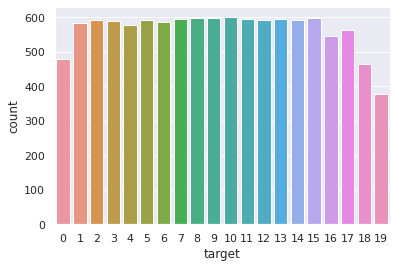

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="target", data=df);

The train data is almost evenly distributed and there is no imbalance in the data.

# Text cleaning or preprocessing

In [ ]:
import string
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
wn = nltk.WordNetLemmatizer()
nltk.download('wordnet')

# data cleaning using regular expression: 
def clean_text(text):
  t_l = text.lower()
  TAG_RE = re.compile(r'<[^>]+>') 
  t = TAG_RE.sub('', t_l) # To remove tags
  # Remove punctuations and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', t)
  # Single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
  # to Strip 2+ duplicate words (consecutive/non-consecutive words)
  #sentence = re.sub(r'(\b\w+\b)(?=.*\b\1\b)','',sentence) 
  t_s = "".join([w for w in sentence if w not in string.punctuation])
  
  tokens = re.split('\W+',t_s)
  txt = [w for w in tokens if w not in stopwords]
  tx = [wn.lemmatize(word) for word in txt]
  for i in range(len(tx)):
    tx[i] = "".join(tx[i])

  return tx

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['cleaned_data']= df['data'].apply(lambda x: clean_text(x))
df1['cleaned_data']= df1['data'].apply(lambda x: clean_text(x))
df['cleaned_data']= df['cleaned_data'].apply(lambda x: ','.join(map(str, x)))
df1['cleaned_data']= df1['cleaned_data'].apply(lambda x: ','.join(map(str, x)))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
# 20 news groups
num_labels = 20
vocab_size = 5000
batch_size = 64

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['cleaned_data'])
x_train = tokenizer.texts_to_matrix(df['cleaned_data'], mode="freq")#'tfidf')
x_test = tokenizer.texts_to_matrix(df1['cleaned_data'], mode="freq")#'tfidf')

Using TensorFlow backend.


In [ ]:
encoder = LabelBinarizer()
encoder.fit(df['target'])
y_train = encoder.transform(df['target'])
y_test = encoder.transform(df1['target'])

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               2560512   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                10260     
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
Total params: 2,570,772
Trainable params: 2,570,772
Non-trainable params: 0
_________________________________________________________________
Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 7s 651us/step - loss: 2.7362 - accuracy: 0.4651 - val_loss: 2.2279 - val_accuracy: 0.7138
Epoch 2/5
10182/10182 [=======================

In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

7532/7532 [==============================] - 1s 139us/step
Test score: 0.7237200100435833
Test accuracy: 0.8052310347557068


In [ ]:
vocab_size = 10000
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['cleaned_data'])
x_train = tokenizer.texts_to_matrix(df['cleaned_data'], mode="freq")#'tfidf')
x_test = tokenizer.texts_to_matrix(df1['cleaned_data'], mode="freq")#'tfidf')
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               5120512   
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)               

In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

7532/7532 [==============================] - 2s 283us/step
Test score: 0.6194503847994326
Test accuracy: 0.816781759262085


## Generalized model

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
# 20 news groups
num_labels = 20
vocab_size = 10000
batch_size = 100

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['data'])
 
x_train = tokenizer.texts_to_matrix(df['data'], mode="freq")#'tfidf')
x_test = tokenizer.texts_to_matrix(df1['data'], mode="freq")#'tfidf')
 
encoder = LabelBinarizer()
encoder.fit(df['target'])
y_train = encoder.transform(df['target'])
y_test = encoder.transform(df1['target'])
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)               

In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

7532/7532 [==============================] - 2s 261us/step
Test score: 0.705298466705858
Test accuracy: 0.7927509546279907


## TF-IDF
we introduce the “TF-IDF” (Term Frequency — Inverse Document Frequency). This will not change the dimension of our data.

In [ ]:
import tensorflow as tf

In [ ]:
# overfit model
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
# 20 news groups
num_labels = 20
vocab_size = 5000
batch_size = 100

# define Tokenizer with Vocab Size
#tokenizer = Tokenizer(num_words=vocab_size)

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ",
    char_level=False,
    document_count=0)
tokenizer.fit_on_texts(df['data'])

x_train = tokenizer.texts_to_matrix(df['data'], mode= 'tfidf')
x_test = tokenizer.texts_to_matrix(df1['data'], mode= 'tfidf')
 
encoder = LabelBinarizer()
encoder.fit(df['target'])
y_train = encoder.transform(df['target'])
y_test = encoder.transform(df1['target'])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               5120512   
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_27 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 20)              

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

7532/7532 [==============================] - 2s 201us/step
Test score: 0.912264796722714
Test accuracy: 0.8199681639671326
